In [2]:
import numpy as np
import torch
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Utilities

The test function that is used for illustrating the workings of the optimisers.

In [3]:
def test_function(x):
    return x[0]**2/15.0+x[1]**2

Utility for plotting the contours of a given function`f` in a range `r` (4-tuple) and 20 levels up to a max level given by `s`. 

In [4]:
def plot_contours(r, s, f):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    delta = 0.01
    X = np.arange(r[0], r[1], delta)
    Y = np.arange(r[2], r[3], delta)
    X,Y = np.meshgrid(X, Y)  
    XX = np.stack((X,Y), axis=0)
    Z=f(XX)
    V=np.arange(0.2,s,s/20)**2
    #CS = plt.contour(X, Y, Z, V, colors=colors)

    CS = plt.contour(X, Y, Z, V)
    #plt.clabel(CS, inline=1, fontsize=10)

Optimisation (i.e. minimisation) of the function `f` starting at `x` (pytorch tensor), by using the given `optimizer` over`nepochs`epochs.  

In [5]:
def optimize(f, x, nepochs, optimizer):
    params = [x,]
    xhist = [x[0].item()]
    yhist = [x[1].item()]
    optimizer.param_groups[0]['params'] = params
    for i in range(nepochs):
        y = f(x)
        optimizer.zero_grad()
        y.backward()
        optimizer.step()
        xhist.append(x[0].item())    
        yhist.append(x[1].item())
    return xhist, yhist

RMS error for measuring the discrepancy to the final target (for the test function above it is (0,0). 

In [6]:
def error(xhist,yhist):
    x,y = xhist[-1], yhist[-1]
    return "%6.3f, (%6.3f, %6.3f)"%(np.sqrt(x**2+y**2),x,y)

### SGD with different learning rates

SGD - lr=0.5   0.755, (-0.755,  0.000)
SGD - lr=0.3   1.326, (-1.326, -0.000)
SGD - lr=0.1   2.294, (-2.294, -0.046)
SGD - lr=0.01   3.958, (-2.921, -2.670)
SGD - lr=0.001   4.870, (-2.992, -3.843)


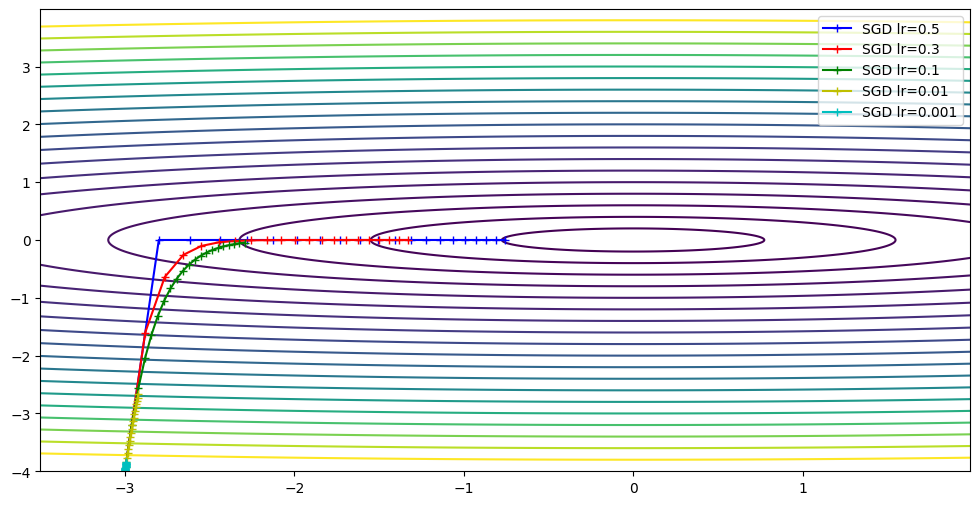

In [19]:
n_epochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,2.,-4.,4.], 4., test_function)

colors = ['b', 'r', 'g', 'y', 'c']
lrs = [5e-1, 3e-1, 1e-1, 1e-2, 1e-3]

for lr, color in zip(lrs, colors):
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    sgd = torch.optim.SGD([x], lr=lr)
    x_hist, y_hist = optimize(test_function, x, n_epochs, sgd)
    print(f"SGD - lr={lr} ", error(x_hist, y_hist))
    plt.plot(x_hist, y_hist, f"{color}-+", label=f"SGD lr={lr}")

plt.legend()



### Tasks 

For better comparison, always use the same (non-optimal) initial point (-3,-4).

* Study SGD for different learning rates. Illustrate the behavior as learned and analysed in week 02.
* Compare Momentum for different momentum parameters ($\beta_1$) and characterise how the optimisation paths qualitatively change.
* Can you spot a difference with / without Nesterov?
* Compare RMSProp for different parameters $\beta_2$ and characterise how the optimisation paths qualitatively change.
* Finally, check different settings for Adam. Identify your best parameters that allows you to get closest the minimum in 25 epochs and with an error of at max 1.0e-3?


# Comparing Momentum

Momentum beta=0.999   4.526, ( 2.121,  3.998)
Momentum beta=0.99   4.101, ( 1.865,  3.652)
Momentum beta=0.9   1.407, ( 0.167,  1.397)
Momentum beta=0.5   1.773, (-1.773, -0.001)
Momentum beta=0   2.294, (-2.294, -0.046)


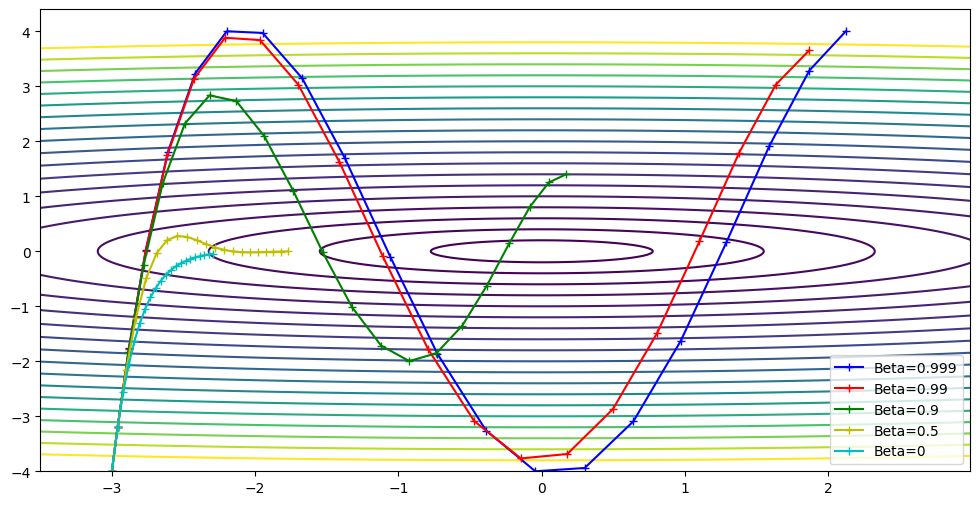

In [29]:
n_epochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,3.,-4,4], 4., test_function)

betas = [0.999, 0.99, 0.9, 0.5, 0]
colors = ['b', 'r', 'g', 'y', 'c']

for beta, color in zip(betas, colors):
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    sgd = torch.optim.SGD([x], lr=0.1, momentum=beta)
    x_hist, y_hist = optimize(test_function, x, n_epochs, sgd)
    print(f"Momentum beta={beta} ", error(x_hist, y_hist))
    plt.plot(x_hist, y_hist, f"{color}-+", label=f"Beta={beta}")

plt.legend()


## Comments
Overshoots a lot

# Momentum with Nesterov

Momentum beta=1   2.052, ( 2.000,  0.457)
Momentum beta=0.999   2.023, ( 1.972,  0.452)
Momentum beta=0.99   1.778, ( 1.729,  0.413)
Momentum beta=0.9   0.199, ( 0.121,  0.158)


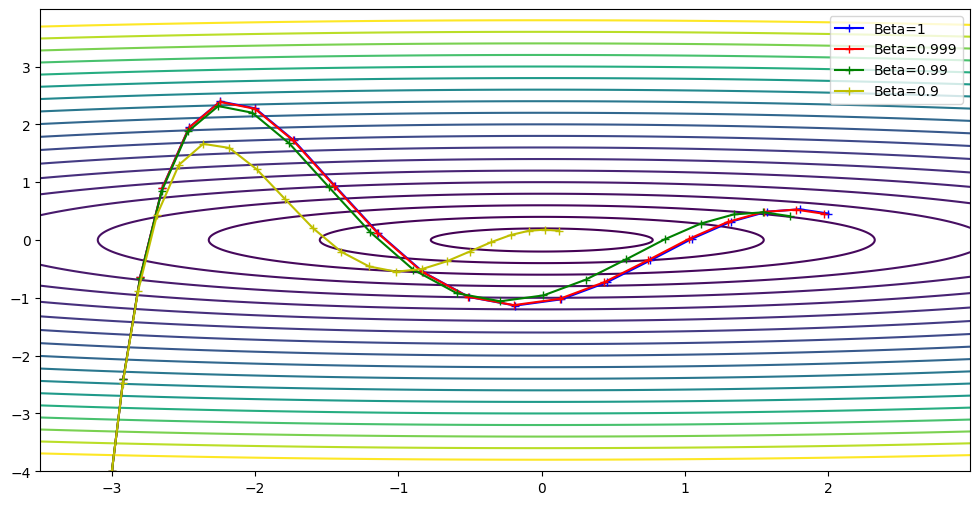

In [27]:
n_epochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,3.,-4,4], 4., test_function)

betas = [1, 0.999, 0.99, 0.9]
colors = ['b', 'r', 'g', 'y']

for beta, color in zip(betas, colors):
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    sgd = torch.optim.SGD([x], lr=0.1, momentum=beta, nesterov=True)
    x_hist, y_hist = optimize(test_function, x, n_epochs, sgd)
    print(f"Momentum beta={beta} ", error(x_hist, y_hist))
    plt.plot(x_hist, y_hist, f"{color}-+", label=f"Beta={beta}")

plt.legend()


## Comments:
Overshoots less than without Nesterov

# RMSprop with different Betas

Beta2=0   0.205, (-0.046,  0.200)
Beta2=0.2   0.224, (-0.150, -0.166)
Beta2=0.4   0.253, (-0.121,  0.222)
Beta2=0.6   0.002, (-0.002, -0.000)
Beta2=0.8   0.020, (-0.000, -0.020)


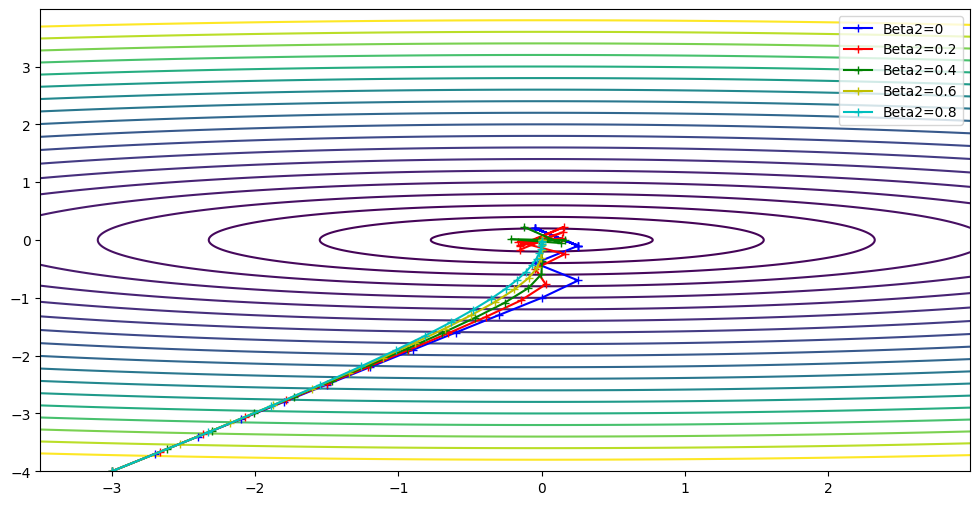

In [31]:
n_epochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,3.,-4,4], 4., test_function)

betas = [0, 0.2, 0.4, 0.6, 0.8]
colors = ['b', 'r', 'g', 'y', 'c']

for beta2, color in zip(betas, colors):
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    rms = torch.optim.RMSprop([x], lr=0.3, alpha=beta2)
    x_hist, y_hist = optimize(test_function, x, n_epochs, rms)
    print(f"Beta2={beta2} ", error(x_hist, y_hist))
    plt.plot(x_hist, y_hist, f"{color}-+", label=f"Beta2={beta2}")

plt.legend()


## Comments
Bigger beta2 leads to a smoother approach in the flatter regions.

# Adam optimization

In [71]:
n_epochs = 25

learning_rates = [1, 3e-1, 1e-1, 1e-2]
beta1s = [0.1, 0.9, 0.99, 0.999]
beta2s = [0.2, 0.4, 0.6, 0.8, 0.99]

results = []

for lr in learning_rates:
    for beta1 in beta1s:
        for beta2 in beta2s:
            x = torch.tensor([-3.0,-4.0]).requires_grad_()
            adam = torch.optim.Adam([x], lr=lr, betas=(beta1, beta2))
            x_hist, y_hist = optimize(test_function, x, n_epochs, adam)
            setting = [lr, beta1, beta2]
            optimizer_error = error(x_hist, y_hist)
            print(f"LR={lr}, Beta1={beta1}, Beta2={beta2}, Error: ", optimizer_error)
            results.append((float(optimizer_error.split(',')[0][1:]), setting))

LR=1, Beta1=0.1, Beta2=0.2, Error:   0.579, (-0.409,  0.409)
LR=1, Beta1=0.1, Beta2=0.4, Error:   0.571, ( 0.403, -0.404)
LR=1, Beta1=0.1, Beta2=0.6, Error:   0.512, (-0.445, -0.253)
LR=1, Beta1=0.1, Beta2=0.8, Error:   0.840, ( 0.840, -0.000)
LR=1, Beta1=0.1, Beta2=0.99, Error:   0.000, ( 0.000, -0.000)
LR=1, Beta1=0.9, Beta2=0.2, Error:   2.196, ( 1.189,  1.847)
LR=1, Beta1=0.9, Beta2=0.4, Error:   1.926, ( 1.059,  1.609)
LR=1, Beta1=0.9, Beta2=0.6, Error:   1.374, ( 0.930,  1.012)
LR=1, Beta1=0.9, Beta2=0.8, Error:   0.856, ( 0.750,  0.413)
LR=1, Beta1=0.9, Beta2=0.99, Error:   0.605, ( 0.494, -0.349)
LR=1, Beta1=0.99, Beta2=0.2, Error:   2.444, (-0.324, -2.423)
LR=1, Beta1=0.99, Beta2=0.4, Error:   2.841, (-0.891, -2.698)
LR=1, Beta1=0.99, Beta2=0.6, Error:   2.979, (-1.240, -2.708)
LR=1, Beta1=0.99, Beta2=0.8, Error:   2.785, (-1.327, -2.449)
LR=1, Beta1=0.99, Beta2=0.99, Error:   2.204, (-1.330, -1.757)
LR=1, Beta1=0.999, Beta2=0.2, Error:   2.931, (-0.922, -2.782)
LR=1, Beta1=0.

In [72]:
sorted_results = sorted(results, key=lambda x: x[0])

# print first 5 results
for i in range(5):
    print(f"Error: {sorted_results[i][0]:>5}, with Learning Rate: {sorted_results[i][1][0]:>3}, Beta1: {sorted_results[i][1][1]:>4}, Beta2: {sorted_results[i][1][2]:>4}")

Error:   0.0, with Learning Rate:   1, Beta1:  0.1, Beta2: 0.99
Error: 0.004, with Learning Rate: 0.3, Beta1:  0.1, Beta2:  0.8
Error:  0.17, with Learning Rate: 0.3, Beta1:  0.1, Beta2: 0.99
Error: 0.172, with Learning Rate: 0.3, Beta1:  0.1, Beta2:  0.2
Error: 0.179, with Learning Rate: 0.3, Beta1:  0.1, Beta2:  0.4


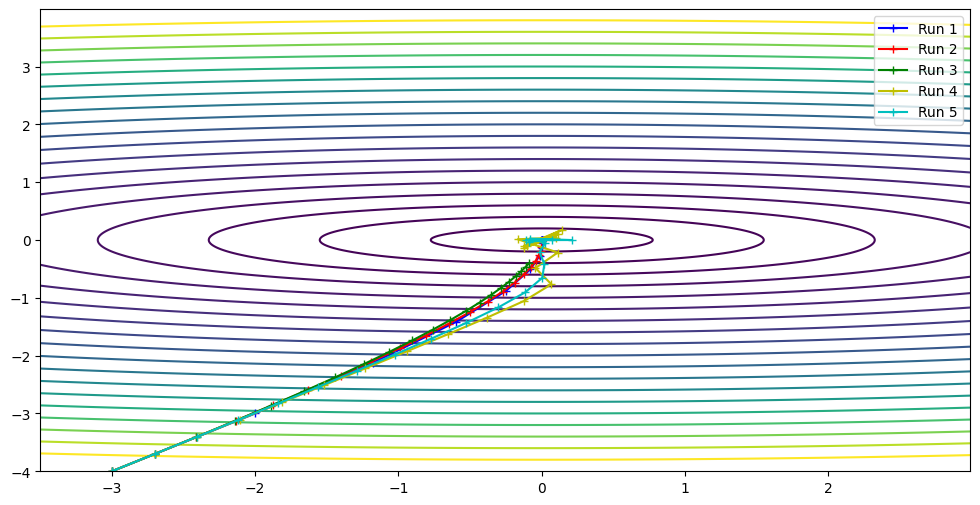

In [73]:
n_epochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,3.,-4,4], 4., test_function)

colors = ['b', 'r', 'g', 'y', 'c']

# plot best 5 results
for i, (settings, color) in enumerate(zip(sorted_results[:5], colors)):
    lr, beta1, beta2 = settings[1][0], settings[1][1], settings[1][2]
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    adam = torch.optim.Adam([x], lr=lr, betas=(beta1, beta2))
    x_hist, y_hist = optimize(test_function, x, n_epochs, adam)
    plt.plot(x_hist, y_hist, f"{color}-+", label=f"Run {i+1}")

plt.legend()
